# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
#The inline flag will make our graphs appear inline in the notebook
%matplotlib inline

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [2]:
# connect to google drive documents
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Class/Module Learning Notebooks/Projects/Python Foundations Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.  

* rating- we see a few "Not given" ratings

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# returns rows and colums present in data
df.shape

(1898, 9)

#### Observations: There's 1898 rows in the data set.  The columns match our first 5 rows and the information provided from the customer.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*  order_id: This is listed as a integer datatype.  However, this is an id and will function as more of a categorical variable.  In some use cases it would be recommended to convert this to a string.
*  customer_id: This is listed as a integer datatype.  However, this is an id and will function as more of a categorical variable.  In some use cases it would be recommended to convert this to a string.
*  restaurant_name: The datatype of this column is object.  All data contained will be a string.
*  cuisine_type: The datatype of this column is object.  All data contained will be a string.
*  cost_of_the_order: The data in this column is a float data type.
*  day_of_the_week: The datatype of this column is object.  All data contained will be a string.
*  rating: The datatype of this column is object.  All data in this column could be considered an integer but the string "Not given" forces the entire column to be a string.
*  food_preparation_time: This is listed as a integer datatype.
*  delivery_time: This is listed as a integer datatype.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
#checks for null/missing values and sums the total value found
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observation**: This data contains no missing values and therefore does not require any missing value treatement.  

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
#returns a statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
*  order_id: The statistical data for this value doesn't have a lot of meaning as this is really a categorical variable not a numberic variable.  This id category should also only ever be used once.

*  customer_id: The statistical data for this value doesn't have a lot of meaning as this is really a categorical variable not a numberic variable.  Unlike the order_id this variable does repeat as we can have repeat customers.  Unfortunately due too it being read as an integer we don't get meaningfull infomration such as number of unique variables, top, freq.  

*  restaurant_name: This is an obj type variable column.  Our top restaraunt is Shake Shack which occurs 219 times.  We have 178 unique resteraunt types that occur in this data.

*  cuisine_type: This is an obj type variable column.  Their are 14 unique types of cuisine with the top cuisine type being American.  American food shows up 584 times in the data.

*  cost_of_the_order: This is a float type column.  The mean value for this column is \$16.49.  The minimum value \$4.47 and maximum value \$35.41 with the medium being \$14.14.  From this table I would expect to see a slight right skew in the data set.

*  day_of_the_week: This is an obj type variable column.  Their are 2 unique types for the day of the week.  The most common is weekend with 1351 occurances in the data set.

*  rating: This column is an obj type column.  Their are 4 unique types for the day of the week.  The most common type is Not given with 736 occurences in the data set.  This column is interesting as it can be seen both as an integer and a categorical variable.  It would be useful to grab statistics with this column as an integer.

*  food_preparation_time: This is an integer type variable column.  The mean is 27.37 minutes.  The minimum value is 20 minutes and the maximum is 35 minutes.  The median is 27 minutes showing a slightly right skewed data set.

*  delivery_time: This is an integer type variable column.  The mean is 24.16 minutes, the minimum is 15 minutes, the maximum is 33 minutes, and the median is 25 minutes.  This data set is slightly left skewed.




```
# This is formatted as code
```

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [9]:
#shows the unique value for order_id
df['order_id'].nunique()

1898

#### Observations:
This confirms that the order id is giving a unique value to each order.

#### Customer ID

In [10]:
#shows the unique value for customer_id
df['customer_id'].nunique()

1200

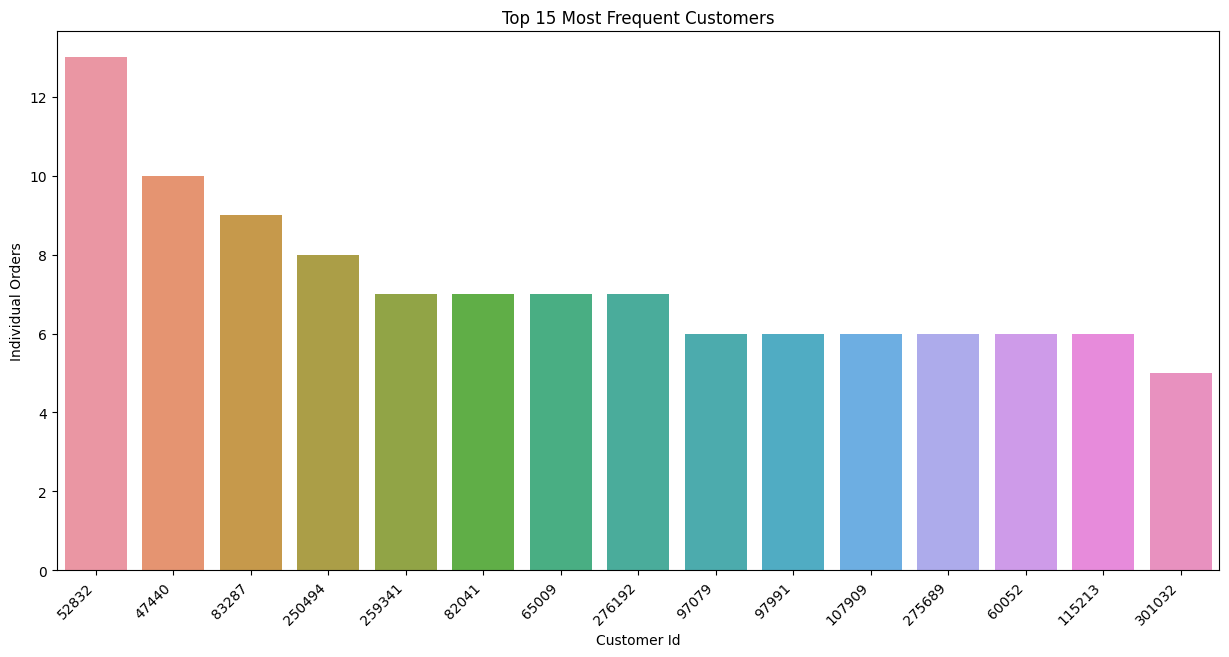

In [11]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a count plot
sns.countplot(data=df,x='customer_id', order=df['customer_id'].value_counts().iloc[:15].index).set(title="Top 15 Most Frequent Customers")

# rotating the axis 45 degrees and moving and aliging to the right
plt.xticks(rotation=45, ha='right')

# x and y labels
plt.xlabel("Customer Id")
plt.ylabel("Individual Orders")

plt.show()

##### Observations:
We can see that their are 1200 unique customers in the data.  From the graph we can see that the top customer has 13 orders and the top 15 all have orders above 4.  

#### Restaurant name

In [12]:
df['restaurant_name'].nunique()

178

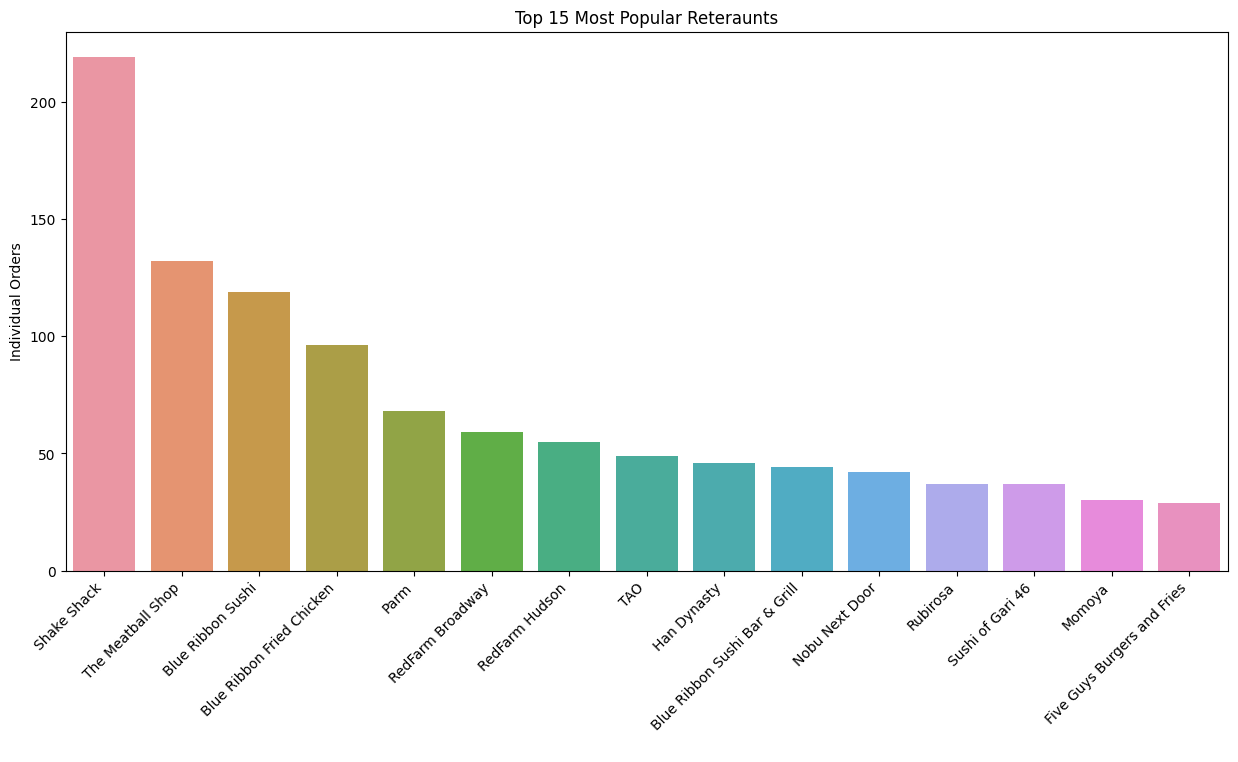

In [13]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a count plot
sns.countplot(data=df,x="restaurant_name", order=df['restaurant_name'].value_counts().iloc[:15].index).set(title="Top 15 Most Popular Reteraunts")

# rotating the axis 45 degrees and moving and aliging to the right
plt.xticks(rotation=45, ha='right')


# x and y labels
plt.ylabel("Individual Orders")
plt.xlabel(" ")

plt.show()

##### Observations:
We can see that their are 178 unique Resteraunts in the data.  From the graph we can see that the top 3 are Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.  The top 3 all are above 100 orders.

#### Cuisine type

In [14]:
#Check unique cuisine type
df['cuisine_type'].nunique()

14

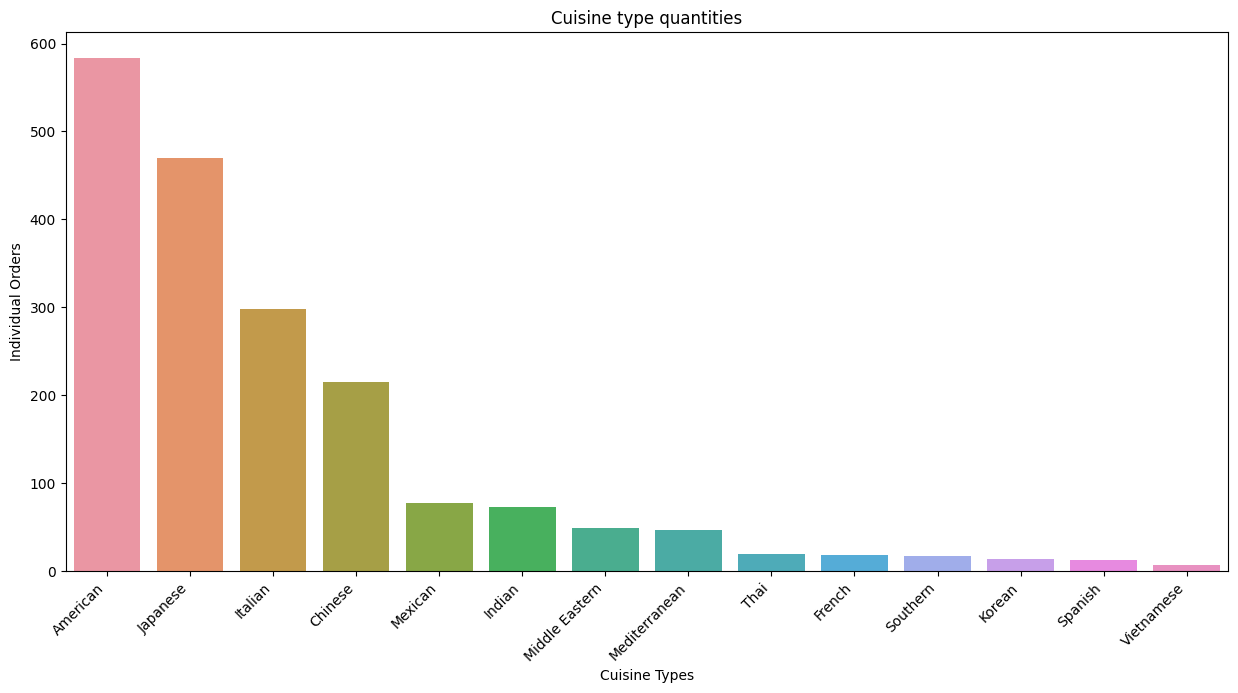

In [15]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a count plot
sns.countplot(data=df,x='cuisine_type', order=df['cuisine_type'].value_counts().index).set(title='Cuisine type quantities')

# rotating the axis 45 degrees and moving and aliging to the right
plt.xticks(rotation=45, ha='right')

# x and y labels
plt.ylabel("Individual Orders")
plt.xlabel("Cuisine Types")

plt.show()

##### Observations:
We can see that their are 14 unique Cuisine types in the data.  From the graph we can see the most popular are American, Japanese, and Italian.  From the previous data set this may likely be too the popularity of a few resteraunts rather than these being favored.

#### Cost of the order

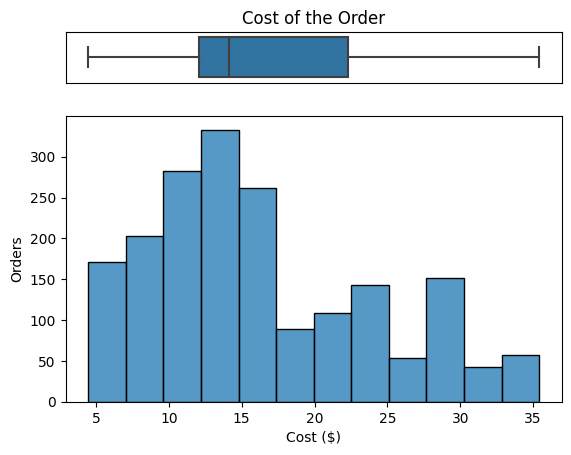

In [16]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
ax_box.set_title('Cost of the Order')

# assigning a graph to each ax
sns.boxplot(df["cost_of_the_order"], orient="h", ax=ax_box)
sns.histplot(data=df, x="cost_of_the_order", ax=ax_hist, bins=12)


# Remove labels extra labels from box plot
ax_box.set(xlabel='', ylabel='')
ax_box.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

# Assigning x and y labels for histplot
ax_hist.set(xlabel='Cost ($)')
ax_hist.set(ylabel='Orders')

plt.show()

##### Observations:
The cost of the order has a right skew.  There are not any outliers in the data.
From the graph we can see that orders frequently cost around $10-15.

#### Day of the week

In [17]:
# check for unique values
df['day_of_the_week'].nunique()

2

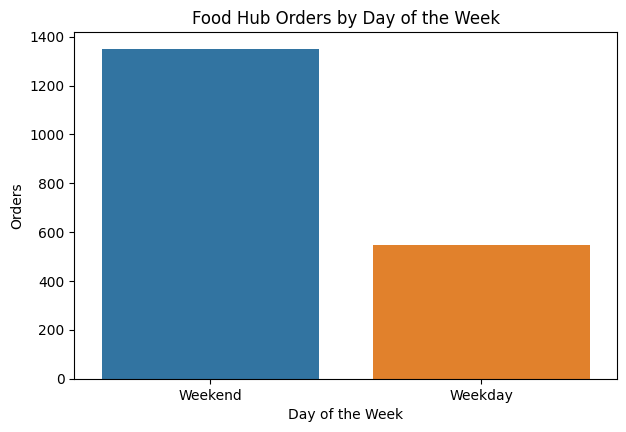

In [18]:
#Controlling the size of the plot
plt.figure(figsize=(7,4.5))

# Creates a count plot
sns.countplot(data=df,x='day_of_the_week').set(title='Food Hub Orders by Day of the Week')

# x and y labels
plt.ylabel("Orders")
plt.xlabel("Day of the Week")

plt.show()

##### Observations:
The majority of orders happen on the weekends

#### Rating

In [19]:
 df['rating'].nunique()

4

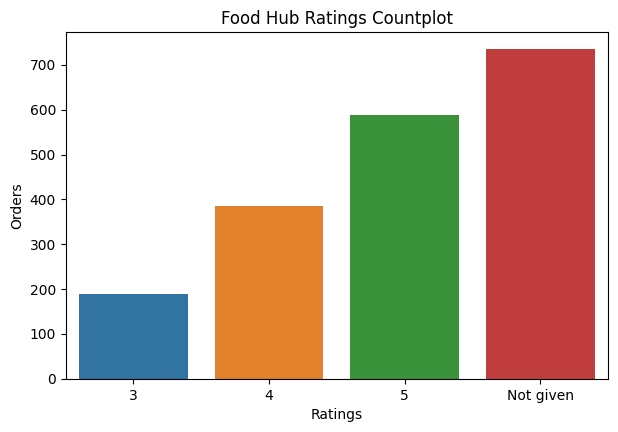

In [20]:
#Controlling the size of the plot
plt.figure(figsize=(7,4.5))

#Order of the ratings on graph
ratings_order = ['3','4','5','Not given']

# Creates a count plot
sns.countplot(data=df,x='rating',order=ratings_order).set(title='Food Hub Ratings Countplot')

# x and y labels
plt.ylabel("Orders")
plt.xlabel("Ratings")

plt.show()

##### Observations:
The majority of the ratings are "Not given.  Then from their 5 star ratings are the most common.

#### Food Preparation time

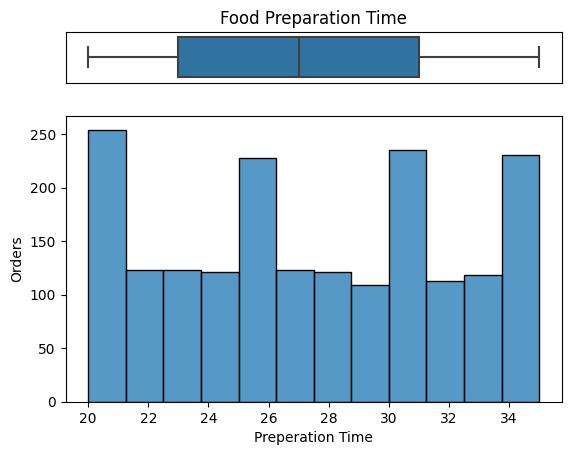

In [21]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
ax_box.set_title('Food Preparation Time')

# assigning a graph to each ax
sns.boxplot(df["food_preparation_time"], orient="h", ax=ax_box)
sns.histplot(data=df, x="food_preparation_time", ax=ax_hist)


# Remove labels extra labels from box plot
ax_box.set(xlabel='', ylabel='')
ax_box.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

# Assigning x and y labels for histplot
ax_hist.set(xlabel='Preperation Time')
ax_hist.set(ylabel='Orders')

plt.show()

##### Observations:
The food preparation time doesn't seem to follow a normal distribution and seems to be completely random but falling in a range of 20-34 minutes.

#### Delivery Time

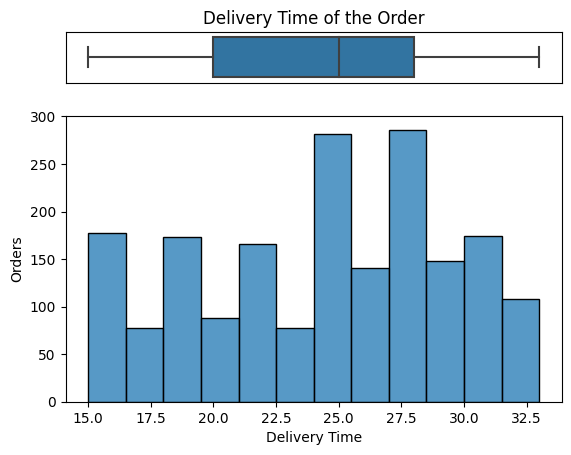

In [22]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
ax_box.set_title('Delivery Time of the Order')

# assigning a graph to each ax
sns.boxplot(df["delivery_time"], orient="h", ax=ax_box)
sns.histplot(data=df, x="delivery_time", ax=ax_hist, bins=12)


# Remove labels extra labels from box plot
ax_box.set(xlabel='', ylabel='')
ax_box.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

# Assigning x and y labels for histplot
ax_hist.set(xlabel='Delivery Time')
ax_hist.set(ylabel='Orders')

plt.show()

##### Observations:
The Delivery time seems to have a lot of noise but a slight normal distribution.  The noise likely has to do with the quantity of Resteraunts in the data set is highly skewed to a few resteraunts.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
df['restaurant_name'].value_counts().iloc[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The top 5 Resteraunts are:

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

The most popular cuisine on the weekends is American food.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:

In the data set 29.24% of orders cost above 20 dollars this equates too 555 orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
df['delivery_time'].mean().round(2)

24.16

#### Observations:

The mean delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
df['customer_id'].value_counts().iloc[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

Tope 3 Customers:

1. Customer 52832 at 13 orders
2. Customer 47440 at 10 orders
3. Customer 83287 at 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the order

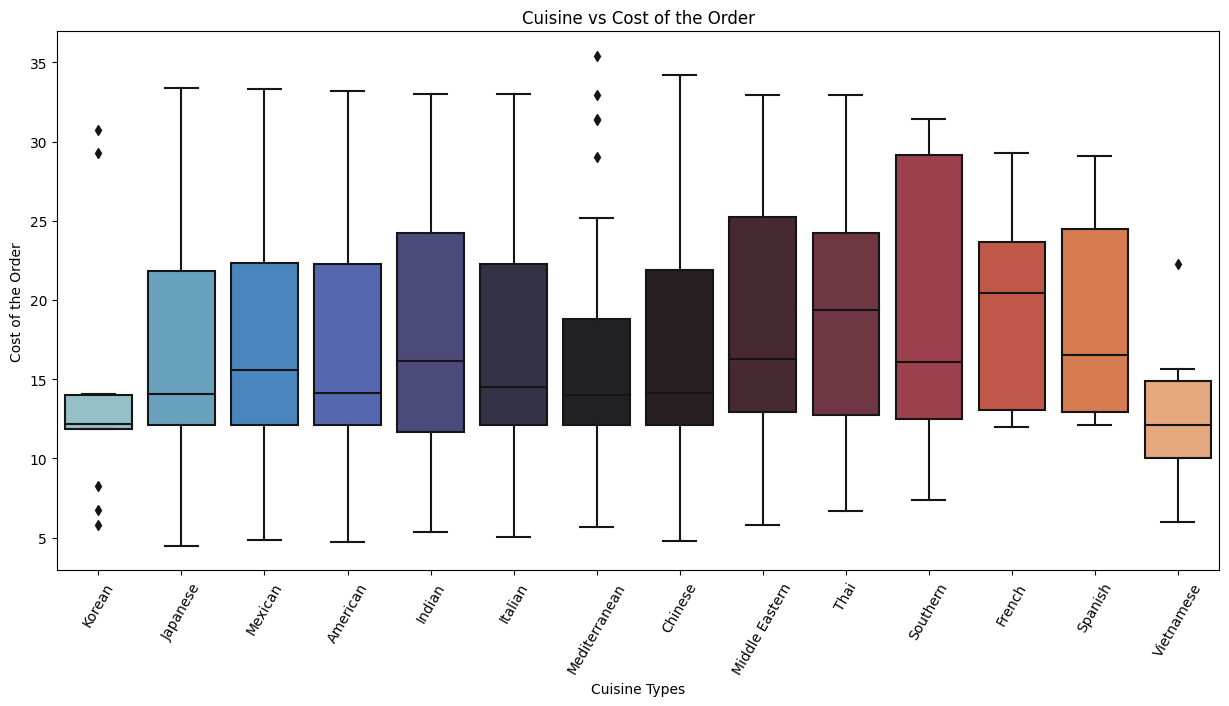

In [28]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a box plot
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'icefire').set(title='Cuisine vs Cost of the Order')

# rotating the axis 60 degrees and moving
plt.xticks(rotation = 60)

# x and y labels
plt.ylabel("Cost of the Order")
plt.xlabel("Cuisine Types")

plt.show()

#### Observations:

The first thing that I am seeing in the data is their are outliers for Korean, Mediterranean, and Vietnamese.  These cuisine types show up very infrequently in the data and therefore I think the outliers may only show up becuase we have low data representation.  Something else to notice is that their is a very tight overlap between all price ranges with the majority of prices between $14-20 dollars per order.  


#### Cuisine vs Food Preparation time

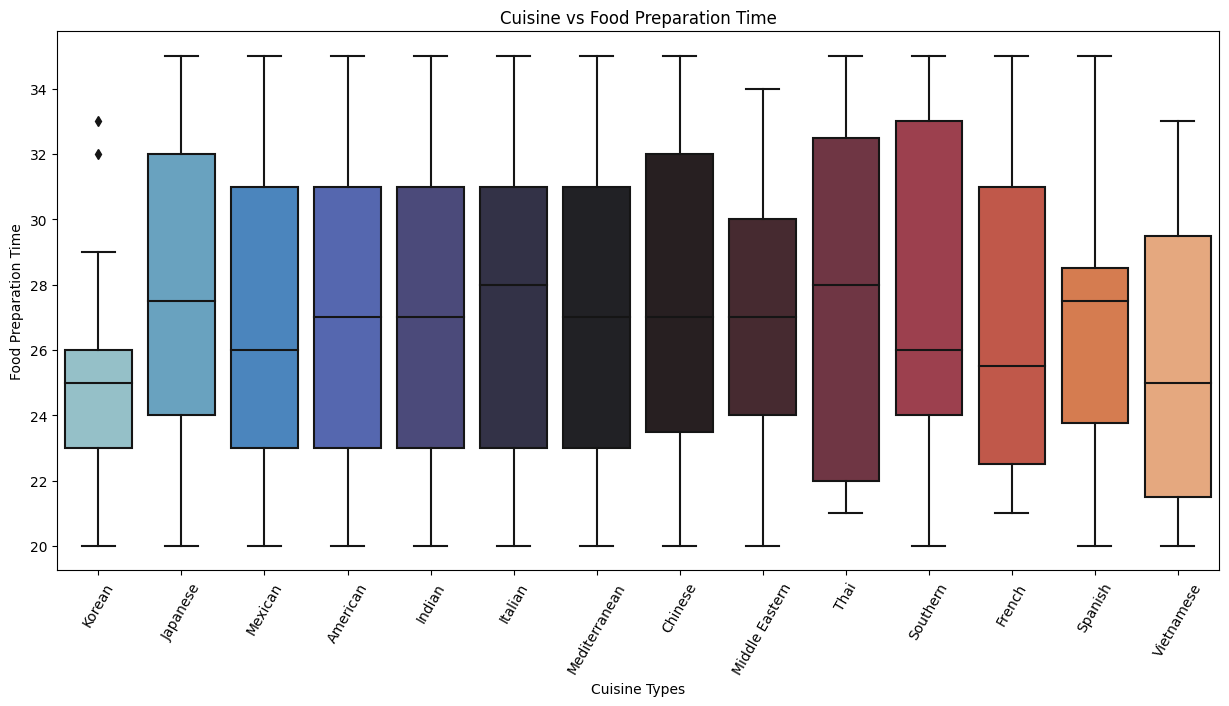

In [29]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a box plot
sns.boxplot(x='cuisine_type', y = 'food_preparation_time', data = df, palette = 'icefire').set(title='Cuisine vs Food Preparation Time')

# rotating the axis 60 degrees and moving
plt.xticks(rotation = 60)

# x and y labels
plt.ylabel("Food Preparation Time")
plt.xlabel("Cuisine Types")

plt.show()

#### Observations:

The food preparation time accross cuisine types seems to be fairly consistent accross cuisine types averaging a preparation time of 23 too 31 minutes.  Korean has a few outliers but also has a very low data set so I think it's likely that these outliers would fall in the IQR for Korean if you had a larger sample size.  


#### Day of the Week vs Delivery time

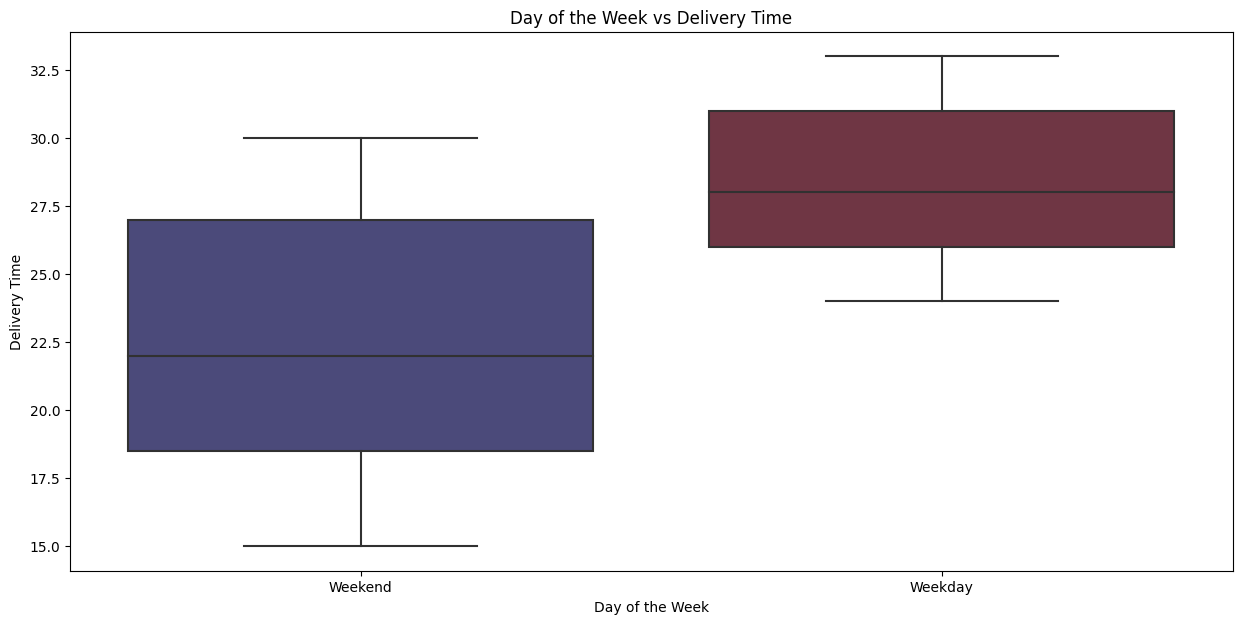

In [30]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a box plot
sns.boxplot(x='day_of_the_week', y = 'delivery_time', data = df, palette = 'icefire').set(title='Day of the Week vs Delivery Time')

# x and y labels
plt.ylabel("Delivery Time")
plt.xlabel("Day of the Week")

plt.show()

#### Observations:

It is clear that it takes longer to deliver food during the week than on the weekend.  This might be a consideration during the week as longer delivery times will be an added expense during the week.


#### Run the below code and write your observations on the revenue generated by the restaurants.

In [31]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observations:

Shake Shack, The Meatball Shope, and both Blue Ribbon's are the top earners.  There is a very steap drop in revenue being generated by each resteraunt past this point with part making three times less than Shake Shack.   Shake Shack which is a similar resaurant to Five Guys is making more than 6 times the revenue.


#### Rating vs Delivery time

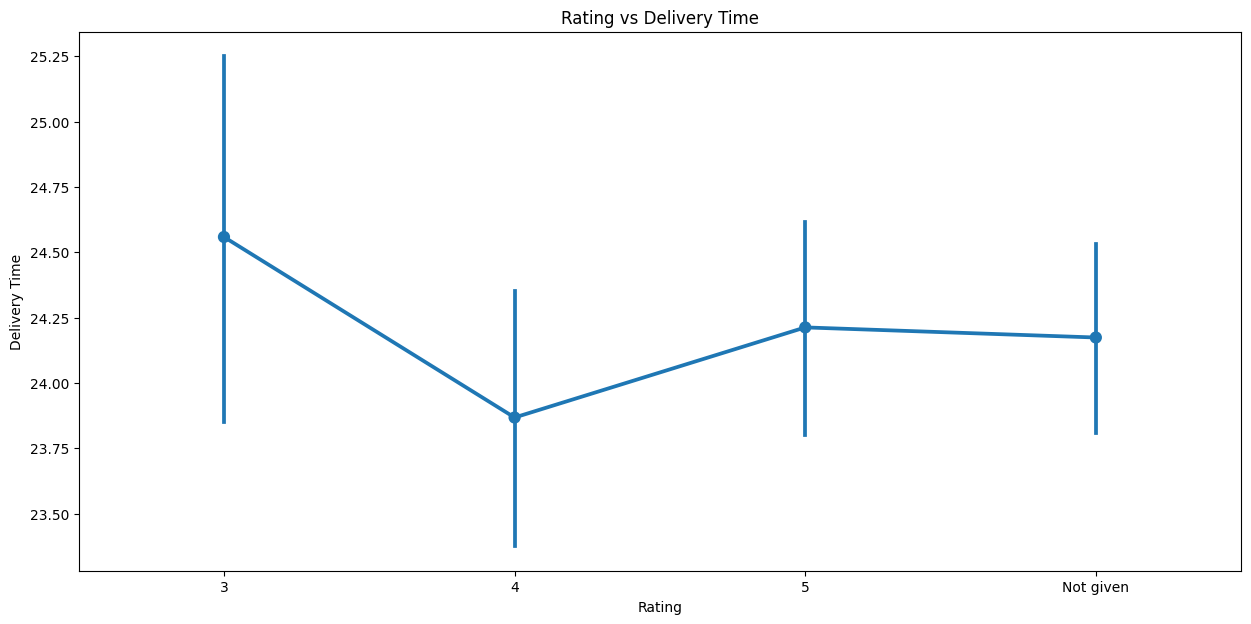

In [32]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a box plot
sns.pointplot(x = 'rating', y = 'delivery_time', data = df,order=ratings_order).set(title='Rating vs Delivery Time')

# x and y labels
plt.ylabel("Delivery Time")
plt.xlabel("Rating")

plt.show()

#### Observations:

There is a correlation between 3 star ratings and a longer delivery time.  Suprisingly the lowest average delivery time correlates strongest with a 4 star rating.  The tendency for a customer to not give a rating and a 5 star rating seem to be fairly closely related.


#### Rating vs Food preparation time

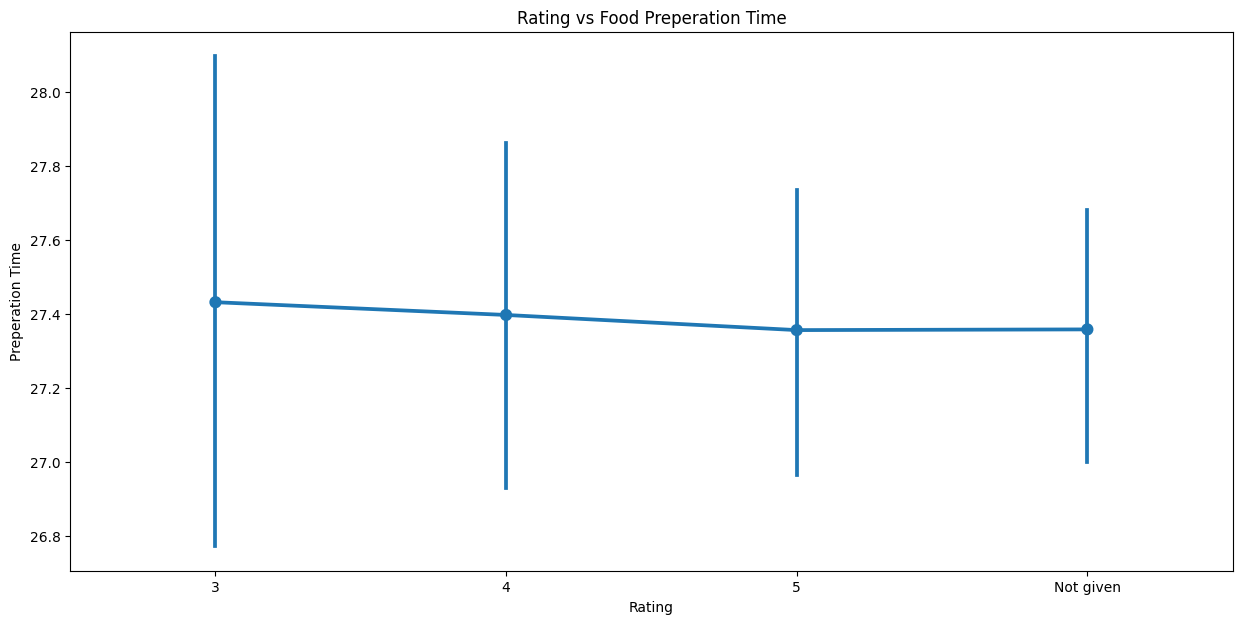

In [33]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a box plot
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df,order=ratings_order).set(title='Rating vs Food Preperation Time')

# x and y labels
plt.ylabel("Preperation Time")
plt.xlabel("Rating")

plt.show()

#### Observations:

Food preparation time has a very low impact on the rating the order will receive.  However, the preparation time of the food increases the distribution of the rating.


#### Rating vs Cost of the order

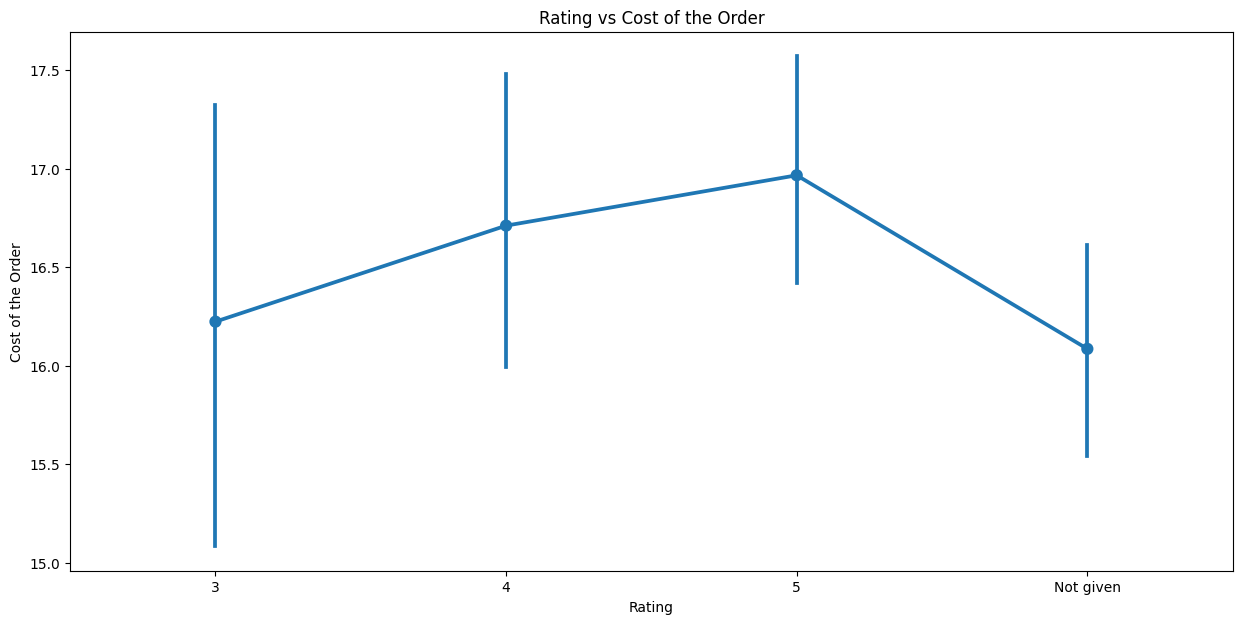

In [34]:
#Controlling the size of the plot
plt.figure(figsize=(15,7))

# Creates a box plot
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df,order=ratings_order).set(title='Rating vs Cost of the Order')

# x and y labels
plt.ylabel("Cost of the Order")
plt.xlabel("Rating")

plt.show()

#### Observations:

A correlation between a higher price of food and a higher rating is present.  There is also a correlation between food that is average cost and not getting a rating at all.


#### Correlation among variables

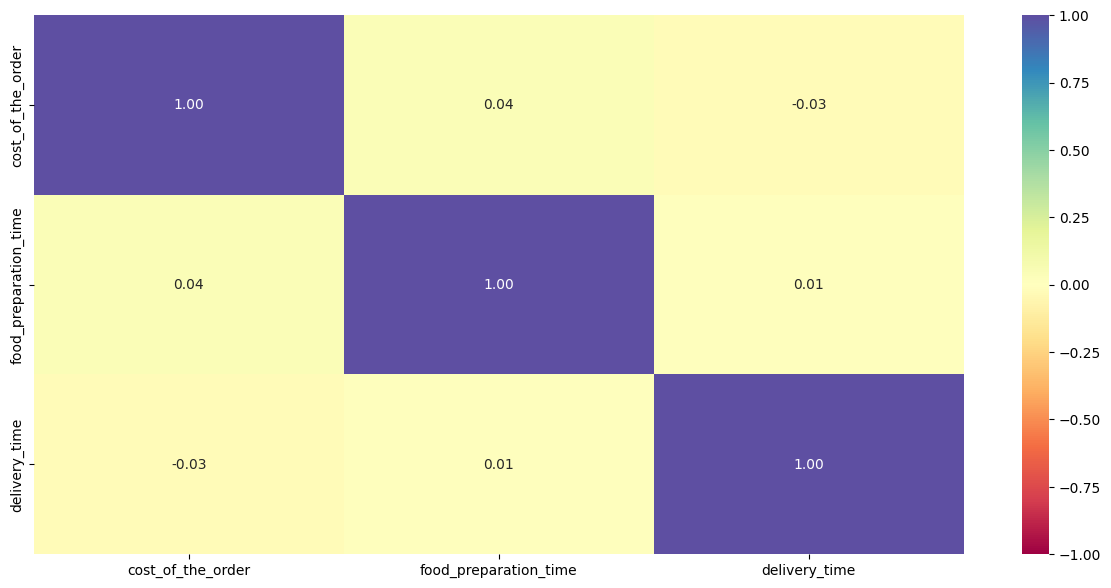

In [35]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:

The highest positive correlation is food preparation time and the cost of the order.  The largest negative correlation is between delivery time and the cost of the order.  Overall, the data doesn't have very large correlations.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [36]:
 # Write the code here# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

df_rated['rating'].describe()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [37]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] >= 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

The qualifiying restaurants are:

1. The Meatball Shope
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [38]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [39]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

The net revenue is around \$6,166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [40]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

#Get orders that take more than 60 minutes to prepare
df_greater_than_60 = df[df['total_time']>60]

# Calculate the number of total orders where the cost is above 20 dollars
print("The number of orders that take more than 60 minutes to prepare is:", df_greater_than_60.shape[0])

# Calculate percentage of orders that take over 60 minutes to prepare
percentage = (df_greater_than_60.shape[0] / df.shape[0])*100

print("Percentage of orders above 60 minutes of delivery time:", round(percentage, 2), '%')


The number of orders that take more than 60 minutes to prepare is: 200
Percentage of orders above 60 minutes of delivery time: 10.54 %


#### Observations:

In the data a total of 200 resauraunts take more than 60 minutes to get too the customer this equates to 1054% of orders.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [41]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:

The mean delivery time is 28 minutes on weekdays and 22 minutes on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  A few Restaurants stand out as the top sellers: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken
* Top cuisines: American, Japanese, Italian, and Chinese
* Orders during the week have a mean delivery of 28 minutes while the weekend is 22 minutes
* Customer's tend to not rate orders and if they do choose to rate an order they are more likely to rate an order if they had a positive experience.  

### Recommendations:

* My first recommendation is to group similar restaurant cuisines together or collect a larger data set.  Cuisine's like Thai, Southern, and Spanish just don't have enough data to draw good conclusions from them.  Grouping American and Southern would allow for better conclusions to be drawn from the data

* I would do some research into why Shake Shack has so many orders but Five guys has a lot less sales.  These are two very similar restaurants with extremely different representation in the dataset.

---